In [1]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE

In [2]:
!ls -lrt
print("hi")

total 3848
-rwxr-xr-x@ 1 klrao  staff    6545 Feb 18  2019 tips.csv
-rwxr-xr-x@ 1 klrao  staff  150105 Feb 18  2019 spx.csv
-rwxr-xr-x@ 1 klrao  staff  460676 Dec 15 21:33 train.csv
-rwxr-xr-x@ 1 klrao  staff  451405 Dec 15 21:33 test.csv
-rwxr-xr-x@ 1 klrao  staff   31939 Dec 15 21:33 sample_submission.csv
-rwxr-xr-x@ 1 klrao  staff   13370 Dec 15 21:33 data_description.txt
-rw-r--r--  1 klrao  staff     555 Apr 11 17:05 Untitled.ipynb
-rw-r--r--@ 1 klrao  staff     224 Apr 11 17:14 House_p.py
-rw-r--r--  1 klrao  staff      72 Apr 12 10:09 Untitled1.ipynb
-rw-r--r--  1 klrao  staff  116672 Apr 12 19:39 Diff_Plots.ipynb
-rw-r--r--  1 klrao  staff   39907 Apr 22 10:48 Untitled2.ipynb
-rw-r--r--  1 klrao  staff   24635 May  1 11:15 submission.csv
-rw-r--r--  1 klrao  staff  641662 May  1 11:16 My_HousePrice_Predict.ipynb
hi


In [3]:
df_train = pd.read_csv("train.csv")



In [4]:
df_train['SalePrice'].min()

34900

In [5]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
print(df_train.apply(lambda x : sum(x.isnull())).T)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
df_train.isna().sum() 


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [9]:

null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
print(df_train[df_train["Electrical"].isnull()][null_columns])

      LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
1379         73.0   NaN       None         0.0       Gd       TA           No   

     BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
1379          Unf          Unf        NaN         NaN    BuiltIn       2007.0   

     GarageFinish GarageQual GarageCond PoolQC Fence MiscFeature  
1379          Fin         TA         TA    NaN   NaN         NaN  


In [11]:
null_columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [12]:
#------------------
# Null Handling
#------------------
df_train.info()
#----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
print("\n\n\nShape of data...",df_train.shape)




Shape of data... (1460, 81)


In [14]:
print("\n\n\nDescribing different numeric attributes...",df_train.describe().T)




Describing different numeric attributes...                 count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     22

In [15]:
df_train['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

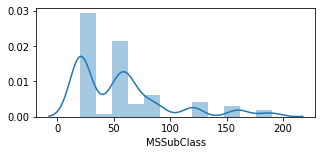

In [16]:
plt.figure(figsize=(5,2))
plt.tight_layout()
sns.distplot(df_train['MSSubClass'],bins=12)

In [17]:
df_train.groupby(df_train['MSSubClass'])['SalePrice'].max(),df_train.groupby(df_train['MSSubClass'])['SalePrice'].min()

(MSSubClass
 20     611657
 30     163500
 40     260000
 45     139400
 50     410000
 60     755000
 70     359100
 75     475000
 80     345000
 85     198500
 90     206300
 120    392500
 160    239000
 180    148000
 190    228950
 Name: SalePrice, dtype: int64,
 MSSubClass
 20      35311
 30      34900
 40      79500
 45      76000
 50      37900
 60     129000
 70      40000
 75     101000
 80     107000
 85     123000
 90      82000
 120     99500
 160     75000
 180     75500
 190     55000
 Name: SalePrice, dtype: int64)

In [18]:
z = zip(df_train[['MSSubClass','SalePrice']].groupby(df_train['MSSubClass'])['SalePrice'].max(),df_train[['MSSubClass','SalePrice']].groupby(df_train['MSSubClass'])['SalePrice'].min())

In [19]:
for i in z:
    print(i)

(611657, 35311)
(163500, 34900)
(260000, 79500)
(139400, 76000)
(410000, 37900)
(755000, 129000)
(359100, 40000)
(475000, 101000)
(345000, 107000)
(198500, 123000)
(206300, 82000)
(392500, 99500)
(239000, 75000)
(148000, 75500)
(228950, 55000)


In [20]:
df_train.groupby(df_train['MSSubClass'])['MSSubClass','SalePrice'].max(),df_train.groupby(df_train['MSSubClass'])['MSSubClass','SalePrice'].min()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(            MSSubClass  SalePrice
 MSSubClass                       
 20                  20     611657
 30                  30     163500
 40                  40     260000
 45                  45     139400
 50                  50     410000
 60                  60     755000
 70                  70     359100
 75                  75     475000
 80                  80     345000
 85                  85     198500
 90                  90     206300
 120                120     392500
 160                160     239000
 180                180     148000
 190                190     228950,
             MSSubClass  SalePrice
 MSSubClass                       
 20                  20      35311
 30                  30      34900
 40                  40      79500
 45                  45      76000
 50                  50      37900
 60                  60     129000
 70                  70      40000
 75                  75     101000
 80                  80     107000
 85                

In [21]:
functions = ['count','min','max']
df_train.groupby(df_train['MSSubClass'])['SalePrice'].agg(functions)

,count,min,max
MSSubClass,,,
20,536,35311,611657
30,69,34900,163500
40,4,79500,260000
45,12,76000,139400
50,144,37900,410000
60,299,129000,755000
70,60,40000,359100
75,16,101000,475000
80,58,107000,345000


In [22]:
df_train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [23]:

df_train.groupby(df_train['MSZoning'])['SalePrice'].agg(functions)

,count,min,max
MSZoning,,,
C (all),10,34900,133900
FV,65,144152,370878
RH,16,76000,200000
RL,1151,39300,755000
RM,218,37900,475000


In [24]:
functions = ['count','min','max','mean','std','median','var']
df_train.groupby(['MSZoning','MSSubClass'])['SalePrice'].agg(functions)

count     min     max           mean            std  \
MSZoning MSSubClass                                                        
C (all)  20              2   35311   55993   45652.000000   14624.382449   
         30              2   34900   81000   57950.000000   32597.622613   
         50              4   68400  108000   91044.000000   18022.452959   
         70              1   40000   40000   40000.000000            NaN   
         190             1  133900  133900  133900.000000            NaN   
FV       20             13  176000  370878  226289.538462   52545.629296   
         60             25  186500  340000  248558.600000   40808.975838   
         120             5  196000  328900  226140.000000   57669.168539   
         160            22  144152  183900  164749.318182   12342.805660   
RH       20              3   82000  119900  102966.666667   19269.232816   
         30              1   79000   79000   79000.000000            NaN   
         45              1   76000   76000   76000.000000            NaN   
         50              1  159434  159434  159434.000000            NaN   
         70              3  103600  140000  124533.333333   18805.672903   
         90              3  144000  145000  144666.666667     577.350269   
         120             2  133000  181000  157000.000000   33941.125497   
         190             2  160000  200000  180000.000000   28284.271247   
RL       20            508   39300  611657  186467.039370   78949.246792   
         30             33   52000  163500   96481.212121   26255.811114   
         40              2  133000  260000  196500.000000   89802.561211   
         45              4   96500  135000  110050.000000   17065.852845   
         50             88   79000  410000  156277.477273   61774.698609   
         60            273  129000  755000  239544.457875   89544.415544   
         70             30  108000  359100  199808.733333   56026.195199   
         75              6  118500  235000  184750.000000   41005.792274   
         80             58  107000  345000  169736.551724   38197.808771   
         85             20  123000  198500  147810.000000   19629.942220   
         90             43   82000  200000  132379.906977   27847.684089   
         120            59   99500  367294  210029.491525   54436.737955   
         160            11  120000  239000  164909.090909   33063.437648   
         190            16   80000  228950  134662.500000   34496.282408   
RM       20             10   93000  149700  121327.500000   19838.957361   
         30             33   52500  153500   97983.969697   22060.325928   
         40              2   79500  152000  115750.000000   51265.241636   
         45              7   87000  139400  112414.285714   20231.199385   
         50             51   37900  256000  124698.039216   32748.218212   
         60              1  135000  135000  135000.000000            NaN   
         70             26   78000  265979  138403.192308   36367.545857   
         75             10  101000  475000  197050.000000  125918.944387   
         90              6  110000  206300  136300.000000   35952.190476   
         120            21  129900  392500  172920.952381   61964.819205   
         160            30   75000  151400  109876.666667   20870.217740   
         180            10   75500  148000  102300.000000   29474.282575   
         190            11   55000  163000  112718.181818   30212.971326   

                       median           var  
MSZoning MSSubClass                          
C (all)  20           45652.0  2.138726e+08  
         30           57950.0  1.062605e+09  
         50           93888.0  3.248088e+08  
         70           40000.0           NaN  
         190         133900.0           NaN  
FV       20          222000.0  2.761043e+09  
         60          250000.0  1.665373e+09  
         120         199900.0  3.325733e+09  
         160         166750.0  1.523449e+08  
RH       20       

In [25]:

df_train.groupby(['MSZoning','MSSubClass','LotShape'])['SalePrice'].agg(functions)

count     min     max           mean  \
MSZoning MSSubClass LotShape                                         
C (all)  20         Reg           2   35311   55993   45652.000000   
         30         Reg           2   34900   81000   57950.000000   
         50         IR1           1   85000   85000   85000.000000   
                    Reg           3   68400  108000   93058.666667   
         70         Reg           1   40000   40000   40000.000000   
...                             ...     ...     ...            ...   
RM       120        Reg          18  129900  207000  151602.222222   
         160        Reg          30   75000  151400  109876.666667   
         180        Reg          10   75500  148000  102300.000000   
         190        IR1           1  122000  122000  122000.000000   
                    Reg          10   55000  163000  111790.000000   

                                       std    median           var  
MSZoning MSSubClass LotShape                                        
C (all)  20         Reg       14624.382449   45652.0  2.138726e+08  
         30         Reg       32597.622613   57950.0  1.062605e+09  
         50         IR1                NaN   85000.0           NaN  
                    Reg       21514.179634  102776.0  4.628599e+08  
         70         Reg                NaN   40000.0           NaN  
...                                    ...       ...           ...  
RM       120        Reg       18978.454519  146750.0  3.601817e+08  
         160        Reg       20870.217740  112500.0  4.355660e+08  
         180        Reg       29474.282575   88500.0  8.687333e+08  
         190        IR1                NaN  122000.0           NaN  
                    Reg       31681.521077  116450.0  1.003719e+09  

[83 rows x 7 columns]

In [26]:
df_train['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [27]:

df_train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [28]:

df_train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

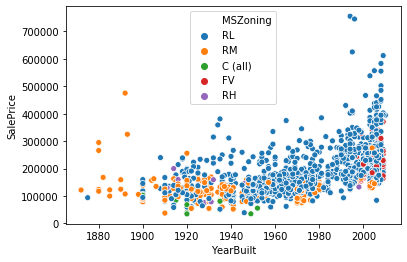

In [29]:
#---------------------------------------
#  Converting Categorical to Numerical 
#  Using One-Hot Encoder
#---------------------------------------
import seaborn as sns
#df_train[] = pd.get_dummies(df_train, columns=["drive_wheels"]).head()
ax = sns.scatterplot(x="YearBuilt", y="SalePrice", hue="MSZoning",data=df_train)

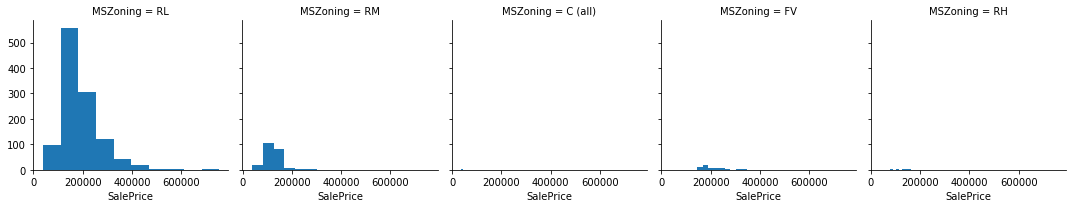

In [30]:
g = sns.FacetGrid(df_train, col="MSZoning")
g = g.map(plt.hist, "SalePrice")

In [32]:
#g = sns.FacetGrid(df_train, col="MSZoning",  row="MSSubClass")
g = g.map(plt.hist, "SalePrice")

ValueError: Axes instance argument was not found in a figure

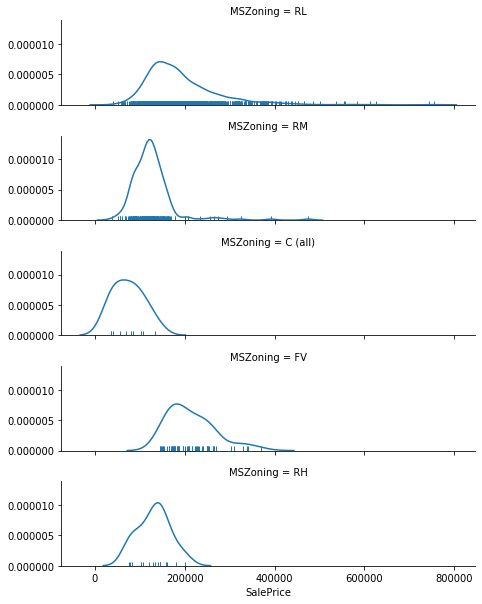

In [33]:
g = sns.FacetGrid(df_train, row="MSZoning",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "SalePrice", hist=False, rug=True);

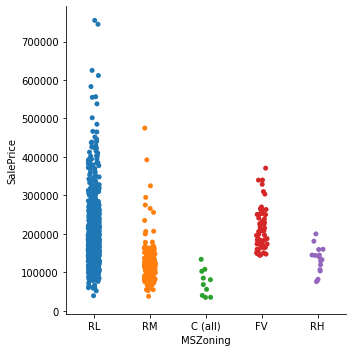

In [34]:
sns.catplot(x="MSZoning", y="SalePrice", data=df_train);

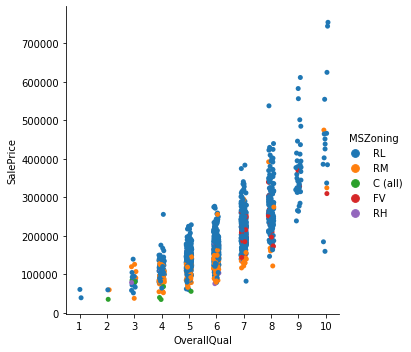

In [35]:
sns.catplot(x="OverallQual", y="SalePrice", hue="MSZoning",data=df_train);

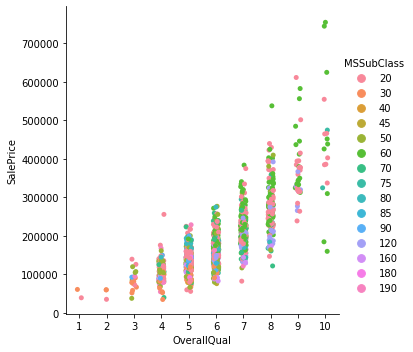

In [36]:
sns.catplot(x="OverallQual", y="SalePrice", hue="MSSubClass",data=df_train);

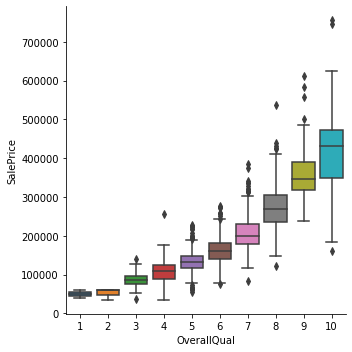

In [37]:
sns.catplot(x="OverallQual", y="SalePrice", kind="box", data=df_train);

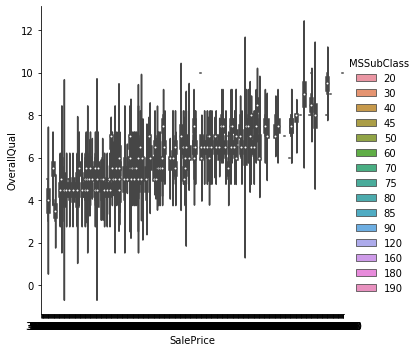

In [38]:
sns.catplot(x="SalePrice", y="OverallQual", hue="MSSubClass",
            kind="violin", data=df_train);

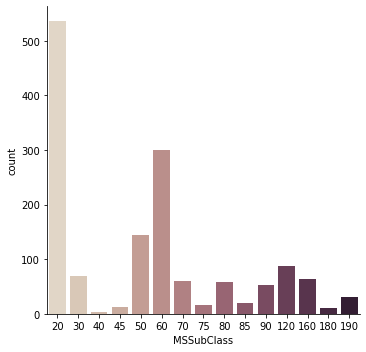

In [39]:
sns.catplot(x="MSSubClass", kind="count", palette="ch:.25", data=df_train);

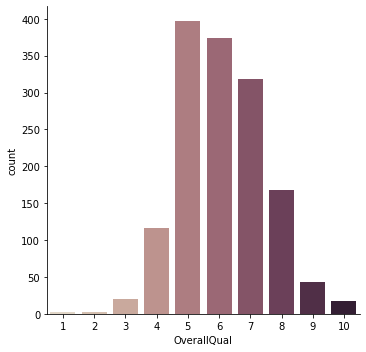

In [40]:
sns.catplot(x="OverallQual", kind="count", palette="ch:.25", data=df_train);

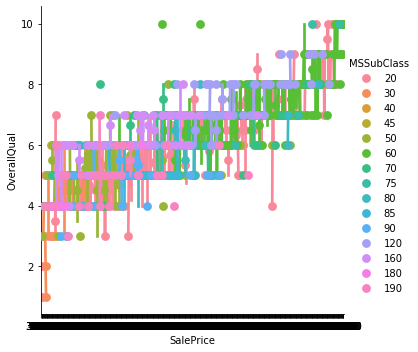

In [41]:
sns.catplot(x="SalePrice", y="OverallQual", hue="MSSubClass", kind="point", data=df_train);

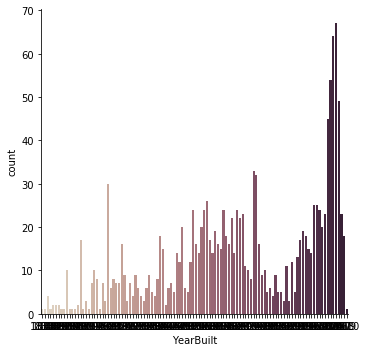

In [42]:
sns.catplot(x="YearBuilt", kind="count", palette="ch:.25", data=df_train);

In [44]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
df_train[df_train['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


In [46]:
function = ['count','max','mean']
df_train.groupby(['MSSubClass','LotFrontage'])['LotFrontage'].agg(function)

count    max   mean
MSSubClass LotFrontage                     
20         36.0             1   36.0   36.0
           37.0             1   37.0   37.0
           40.0             1   40.0   40.0
           42.0             1   42.0   42.0
           43.0             3   43.0   43.0
...                       ...    ...    ...
190        76.0             1   76.0   76.0
           85.0             1   85.0   85.0
           90.0             1   90.0   90.0
           100.0            1  100.0  100.0
           107.0            1  107.0  107.0

[374 rows x 3 columns]

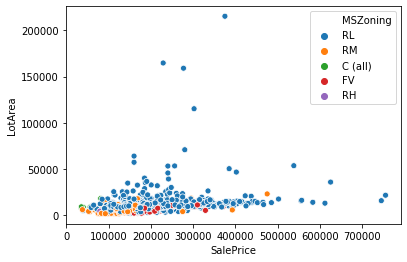

In [47]:
ax = sns.scatterplot(x="SalePrice", y="LotArea", hue="MSZoning",data=df_train)

In [48]:
df_train.groupby(['MSSubClass','LotShape'])['MSSubClass','LotShape'].mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


MSSubClass
MSSubClass LotShape            
20         IR1               20
           IR2               20
           IR3               20
           Reg               20
30         IR1               30
           IR3               30
           Reg               30
40         Reg               40
45         IR1               45
           Reg               45
50         IR1               50
           IR2               50
           Reg               50
60         IR1               60
           IR2               60
           IR3               60
           Reg               60
70         IR1               70
           Reg               70
75         IR1               75
           IR2               75
           Reg               75
80         IR1               80
           Reg               80
85         IR1               85
           Reg               85
90         IR1               90
           IR2               90
           Reg               90
120        IR1              120
           IR2              120
           Reg              120
160        IR1              160
           IR2              160
           Reg              160
180        Reg              180
190        IR1              190
           Reg              190

In [49]:
import numpy as np
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train.groupby('MSSubClass')['LotFrontage'].transform(f))
print (df_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [50]:
df_train[df_train['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [51]:
(df_train.MSZoning[df_train['MSZoning']!= None].count(),
df_train.MSSubClass[df_train['MSSubClass']!= None].count(),
df_train['MSZoning'][df_train['MSZoning']!= None].count())

(1460, 1460, 1460)

In [52]:
for index,col in enumerate(df_train.columns):
    
    cnt = df_train[col][df_train[col]!= None].count()
    missing = 1460 - cnt
    num_u_val = df_train[col].nunique()
    if(cnt < 1460):
        print(f"{col} -> {cnt} \t-> {missing}\t->{num_u_val}")
    

Alley -> 91 	-> 1369	->2
MasVnrType -> 1452 	-> 8	->4
MasVnrArea -> 1452 	-> 8	->327
BsmtQual -> 1423 	-> 37	->4
BsmtCond -> 1423 	-> 37	->4
BsmtExposure -> 1422 	-> 38	->4
BsmtFinType1 -> 1423 	-> 37	->6
BsmtFinType2 -> 1422 	-> 38	->6
Electrical -> 1459 	-> 1	->5
FireplaceQu -> 770 	-> 690	->5
GarageType -> 1379 	-> 81	->6
GarageYrBlt -> 1379 	-> 81	->97
GarageFinish -> 1379 	-> 81	->3
GarageQual -> 1379 	-> 81	->5
GarageCond -> 1379 	-> 81	->5
PoolQC -> 7 	-> 1453	->3
Fence -> 281 	-> 1179	->4
MiscFeature -> 54 	-> 1406	->4


In [53]:
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [54]:
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0], inplace=True)

In [55]:
df_train['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [56]:
df_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [57]:
df_train['GarageType'].fillna(df_train['GarageType'].mode()[0], inplace=True)

In [58]:
df_train['GarageType'].value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [59]:

df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0], inplace=True)
df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0], inplace=True)
df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0], inplace=True)
df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0], inplace=True)

In [60]:
(df_train.GarageYrBlt[df_train['GarageYrBlt']!= None].count(),
df_train.GarageFinish[df_train['GarageFinish']!= None].count(),
df_train['GarageQual'][df_train['GarageQual']!= None].count(),
df_train['GarageCond'][df_train['GarageCond']!= None].count(),
df_train['MSSubClass'][df_train['MSSubClass']!= None].count(),
df_train['MSZoning'][df_train['MSZoning']!= None].count(),
df_train['LotFrontage'][df_train['LotFrontage']!= None].count(),
df_train['LotArea'][df_train['LotArea']!= None].count())
 

(1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460)

In [61]:
le_GarageYrBlt = preprocessing.LabelEncoder()
le_GarageYrBlt.fit(df_train['GarageYrBlt'])

LabelEncoder()

In [62]:
df_train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [66]:
le_GarageFinish = preprocessing.LabelEncoder()
le_GarageFinish.fit(df_train['GarageFinish'])

df_train['GarageFinish'] = le_GarageFinish.transform(df_train['GarageFinish'])

le_GarageQual = preprocessing.LabelEncoder()
le_GarageQual.fit(df_train['GarageQual'])
df_train['GarageQual'] = le_GarageQual.transform(df_train['GarageQual'])

le_GarageCond = preprocessing.LabelEncoder()
le_GarageCond.fit(df_train['GarageCond'])
df_train['GarageCond'] = le_GarageCond.transform(df_train['GarageCond'])

le_MSSubClass = preprocessing.LabelEncoder()
le_MSSubClass.fit(df_train['MSSubClass'])
df_train['MSSubClass'] = le_MSSubClass.transform(df_train['MSSubClass'])

le_MSZoning = preprocessing.LabelEncoder()
le_MSZoning.fit(df_train['MSZoning'])
df_train['MSZoning'] = le_MSZoning.transform(df_train['MSZoning'])

le_GarageType = preprocessing.LabelEncoder()
le_GarageType.fit(df_train['GarageType'])
df_train['GarageType'] = le_GarageType.transform(df_train['GarageType'])

In [67]:
df_t = df_train.copy()

In [68]:
df_t

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,0,3,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,5,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,6,3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,5,3,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,5,3,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,0,3,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,6,3,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,0,3,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [69]:
# Function to calculate and print mean square error

from sklearn.metrics import mean_squared_error, r2_score


def printError(y_test,y_pred,ModelName):
    print('RMSE ',ModelName,': ',np.sqrt(((y_pred - y_test) ** 2).mean()) )
    print('MAE ',ModelName,': ',mae(y_test,y_pred) )
    error = abs(y_pred-y_test)
    print('Median Abs Error: ',round(np.mean(error),2 ))
    print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

In [70]:
features = ['GarageType', 'GarageYrBlt' , 'GarageFinish', 'GarageQual', 'GarageCond', 'MSSubClass', 'MSZoning','LotArea','YrSold',]
X = df_t[features]
y = df_t['SalePrice']
X_train,x_test, y_train, y_test =  train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
(X_train.shape,y_train.shape,x_test.shape,y_test.shape,df_t.shape)

((1021, 9), (1021,), (438, 9), (438,), (1460, 81))

In [71]:
X_train

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,MSSubClass,MSZoning,LotArea,YrSold
210,1,2005.0,2,4,4,1,3,5604,2008
318,1,1993.0,1,4,4,5,3,9900,2009
239,5,1949.0,2,4,4,4,3,8741,2010
986,1,1950.0,2,1,4,4,4,5310,2006
1416,5,1971.0,2,4,4,14,4,11340,2010
...,...,...,...,...,...,...,...,...,...
1009,1,2005.0,2,4,4,4,3,6000,2006
802,1,2005.0,0,4,4,5,3,8199,2008
53,1,1981.0,0,4,4,0,3,50271,2006
350,1,2007.0,1,4,4,11,3,7820,2007


In [72]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_predLinReg = linReg.predict(x_test)
printError(y_test,y_predLinReg,"linReg")

RMSE  linReg :  65231.50801951644
MAE  linReg :  45398.92148216669
Median Abs Error:  45398.92
Coefficient of determination: 0.34


In [73]:

from sklearn.tree import DecisionTreeRegressor  
DTRegressor =  DecisionTreeRegressor()
DTRegressor.fit(X_train, y_train)
y_pred_DT = DTRegressor.predict(x_test)
printError(y_test,y_pred_DT,"DTRegressor")

RMSE  DTRegressor :  69707.14119708154
MAE  DTRegressor :  44779.52739726027
Median Abs Error:  44779.53
Coefficient of determination: 0.24


In [74]:
# Training a RandomForestRegressor model

from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rfRegressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rfRegressor.fit(X_train, y_train)
y_predRf = rfRegressor.predict(x_test)
printError(y_test,y_predRf,"rfRegressor")

RMSE  rfRegressor :  52364.8032414589
MAE  rfRegressor :  32956.49104414365
Median Abs Error:  32956.49
Coefficient of determination: 0.57


In [75]:
#Viewing the regression coefficients and intercept of the regression equation
#To retrieve the intercept:

print("linReg.intercept_" ,linReg.intercept_)
#For retrieving the slope:
print("linReg.coef_", linReg.coef_)

linReg.intercept_ 3413313.1493486417
linReg.coef_ [-1.77740251e+03  7.10459866e+02 -4.03487369e+04 -6.47819810e+03
  5.86837376e+03 -7.70304796e+02 -4.46954408e+03  1.51413317e+00
 -2.28250264e+03]


In [76]:
from sklearn import linear_model
linModel = linear_model.Ridge(alpha=.009)
linModel.fit(X_train, y_train)
y_predLinModel = linModel.predict(x_test)
printError(y_test,y_predLinModel,"linModel")



RMSE  linModel :  65231.51123498208
MAE  linModel :  45398.88253931715
Median Abs Error:  45398.88
Coefficient of determination: 0.34


In [77]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.042)
lasso.fit(X_train, y_train)
y_predLasso = lasso.predict(x_test)
printError(y_test,y_predLasso,"lasso")



RMSE  lasso :  65231.515353727584
MAE  lasso :  45398.910181220075
Median Abs Error:  45398.91
Coefficient of determination: 0.34


No handles with labels found to put in legend.


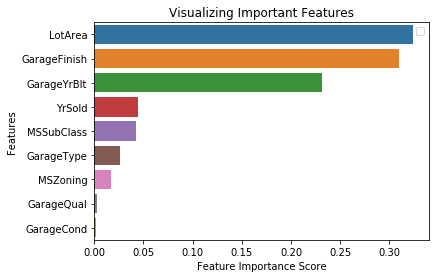

In [78]:
featImportance = sorted(zip(map(lambda x: round(x, 4), rfRegressor.feature_importances_), X_train.columns), reverse=True)
vals =[]
labels = []
for row in featImportance:
    vals.append(row[0])
    labels.append(row[1])
    
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=vals, y=labels)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [79]:
df_t[-20:]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1440,1441,6,3,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
1441,1442,11,4,44.0,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1442,1443,5,1,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
1443,1444,1,3,59.0,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
1444,1445,0,3,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
1445,1446,9,3,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,0,3,75.0,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1447,1448,5,3,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1448,1449,4,3,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
1449,1450,13,4,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000


In [80]:

df_test_set = pd.read_csv("test.csv")


In [81]:
df_sample_subm = pd.read_csv("sample_submission.csv")

In [82]:
df_test_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [83]:
df_sample_subm

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [84]:
features = ['GarageType', 'GarageYrBlt' , 'GarageFinish', 'GarageQual', 'GarageCond', 'MSSubClass', 'MSZoning','LotArea','YrSold',]
x_test_1 = df_test_set['Id']
x_test_2 = df_test_set[features]
#linModel

In [85]:
x_test_1

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [86]:
x_test_2

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,MSSubClass,MSZoning,LotArea,YrSold
0,Attchd,1961.0,Unf,TA,TA,20,RH,11622,2010
1,Attchd,1958.0,Unf,TA,TA,20,RL,14267,2010
2,Attchd,1997.0,Fin,TA,TA,60,RL,13830,2010
3,Attchd,1998.0,Fin,TA,TA,60,RL,9978,2010
4,Attchd,1992.0,RFn,TA,TA,120,RL,5005,2010
...,...,...,...,...,...,...,...,...,...
1454,NaN,NaN,NaN,NaN,NaN,160,RM,1936,2006
1455,CarPort,1970.0,Unf,TA,TA,160,RM,1894,2006
1456,Detchd,1960.0,Unf,TA,TA,20,RL,20000,2006
1457,NaN,NaN,NaN,NaN,NaN,85,RL,10441,2006


In [87]:
import pandas as pd
tmp = pd.concat([x_test_1, x_test_2], axis=1)

In [88]:
tmp

,Id,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,MSSubClass,MSZoning,LotArea,YrSold
0,1461,Attchd,1961.0,Unf,TA,TA,20,RH,11622,2010
1,1462,Attchd,1958.0,Unf,TA,TA,20,RL,14267,2010
2,1463,Attchd,1997.0,Fin,TA,TA,60,RL,13830,2010
3,1464,Attchd,1998.0,Fin,TA,TA,60,RL,9978,2010
4,1465,Attchd,1992.0,RFn,TA,TA,120,RL,5005,2010
...,...,...,...,...,...,...,...,...,...,...
1454,2915,NaN,NaN,NaN,NaN,NaN,160,RM,1936,2006
1455,2916,CarPort,1970.0,Unf,TA,TA,160,RM,1894,2006
1456,2917,Detchd,1960.0,Unf,TA,TA,20,RL,20000,2006
1457,2918,NaN,NaN,NaN,NaN,NaN,85,RL,10441,2006


In [89]:
print(x_test_2.apply(lambda x : sum(x.isnull())).T)

GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageQual      78
GarageCond      78
MSSubClass       0
MSZoning         4
LotArea          0
YrSold           0
dtype: int64


In [90]:
x_test_2['GarageYrBlt'].fillna(x_test_2['GarageYrBlt'].mode()[0], inplace=True)
x_test_2['GarageFinish'].fillna(x_test_2['GarageFinish'].mode()[0], inplace=True)
x_test_2['GarageQual'].fillna(x_test_2['GarageQual'].mode()[0], inplace=True)
x_test_2['GarageCond'].fillna(x_test_2['GarageCond'].mode()[0], inplace=True)
x_test_2['GarageType'].fillna(x_test_2['GarageType'].mode()[0], inplace=True)
x_test_2['MSZoning'].fillna(x_test_2['MSZoning'].mode()[0], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [91]:
le_GFinish = preprocessing.LabelEncoder()
le_GFinish.fit(x_test_2['GarageFinish'])

x_test_2['GarageFinish'] = le_GFinish.transform(x_test_2['GarageFinish'])

x_test_2['GarageFinish'] 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       2
1       2
2       0
3       0
4       1
       ..
1454    2
1455    2
1456    2
1457    2
1458    0
Name: GarageFinish, Length: 1459, dtype: int64

In [92]:

le_GQual = preprocessing.LabelEncoder()
le_GQual.fit(x_test_2['GarageQual'])
x_test_2['GarageQual'] = le_GQual.transform(x_test_2['GarageQual'])

le_GCond = preprocessing.LabelEncoder()
le_GCond.fit(x_test_2['GarageCond'])
x_test_2['GarageCond'] = le_GCond.transform(x_test_2['GarageCond'])

le_MClass = preprocessing.LabelEncoder()
le_MClass.fit(x_test_2['MSSubClass'])
x_test_2['MSSubClass'] = le_MClass.transform(x_test_2['MSSubClass'])

le_MSZoning = preprocessing.LabelEncoder()
le_MSZoning.fit(x_test_2['MSZoning'])
x_test_2['MSZoning'] = le_MSZoning.transform(x_test_2['MSZoning'])

le_GType = preprocessing.LabelEncoder()
le_GType.fit(x_test_2['GarageType'])
x_test_2['GarageType'] = le_GType.transform(x_test_2['GarageType'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [93]:
x_test_2

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,MSSubClass,MSZoning,LotArea,YrSold
0,1,1961.0,2,3,4,0,2,11622,2010
1,1,1958.0,2,3,4,0,3,14267,2010
2,1,1997.0,0,3,4,5,3,13830,2010
3,1,1998.0,0,3,4,5,3,9978,2010
4,1,1992.0,1,3,4,11,3,5005,2010
...,...,...,...,...,...,...,...,...,...
1454,1,2005.0,2,3,4,13,4,1936,2006
1455,4,1970.0,2,3,4,13,4,1894,2006
1456,5,1960.0,2,3,4,0,3,20000,2006
1457,1,2005.0,2,3,4,9,3,10441,2006


In [94]:
x_test_1

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [95]:
tmp['SalePrice'] = rfRegressor.predict(x_test_2)

In [96]:
tmp['SalePrice'].min()

56998.246

In [97]:
tmp

,Id,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,MSSubClass,MSZoning,LotArea,YrSold,SalePrice
0,1461,Attchd,1961.0,Unf,TA,TA,20,RH,11622,2010,147578.059
1,1462,Attchd,1958.0,Unf,TA,TA,20,RL,14267,2010,162823.272
2,1463,Attchd,1997.0,Fin,TA,TA,60,RL,13830,2010,265670.917
3,1464,Attchd,1998.0,Fin,TA,TA,60,RL,9978,2010,226159.722
4,1465,Attchd,1992.0,RFn,TA,TA,120,RL,5005,2010,221401.700
...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,NaN,NaN,NaN,NaN,NaN,160,RM,1936,2006,86009.150
1455,2916,CarPort,1970.0,Unf,TA,TA,160,RM,1894,2006,88623.814
1456,2917,Detchd,1960.0,Unf,TA,TA,20,RL,20000,2006,172569.997
1457,2918,NaN,NaN,NaN,NaN,NaN,85,RL,10441,2006,136881.470


In [ ]:
tmp.to_csv("submission.csv", columns=["Id", "SalePrice"], index=False)


In [ ]:
!ls -lrt submission.csv

In [ ]:
dff = pd.read_csv('submission.csv')

In [ ]:
dff['SalePrice'].min()

In [98]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,0,3,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,5,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,6,3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,5,3,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,5,3,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,0,3,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,6,3,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,0,3,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [114]:

features = ['GarageType', 'GarageYrBlt' , 'GarageFinish', 'GarageQual', 'GarageCond', 
            'MSSubClass', 'MSZoning','LotArea','YrSold','OverallQual','SalePrice']


df_c = df_train[features]

df_c

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,MSSubClass,MSZoning,LotArea,YrSold,OverallQual,SalePrice
0,1,2003.0,1,4,4,5,3,8450,2008,7,208500
1,1,1976.0,1,4,4,0,3,9600,2007,6,181500
2,1,2001.0,1,4,4,5,3,11250,2008,7,223500
3,5,1998.0,2,4,4,6,3,9550,2006,7,140000
4,1,2000.0,1,4,4,5,3,14260,2008,8,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1999.0,1,4,4,5,3,7917,2007,6,175000
1456,1,1978.0,2,4,4,0,3,13175,2010,6,210000
1457,1,1941.0,1,4,4,6,3,9042,2010,7,266500
1458,1,1950.0,2,4,4,0,3,9717,2010,5,142125


In [115]:
df_c['MSZoning'].corr(df_c['SalePrice'])

-0.1668722026532062

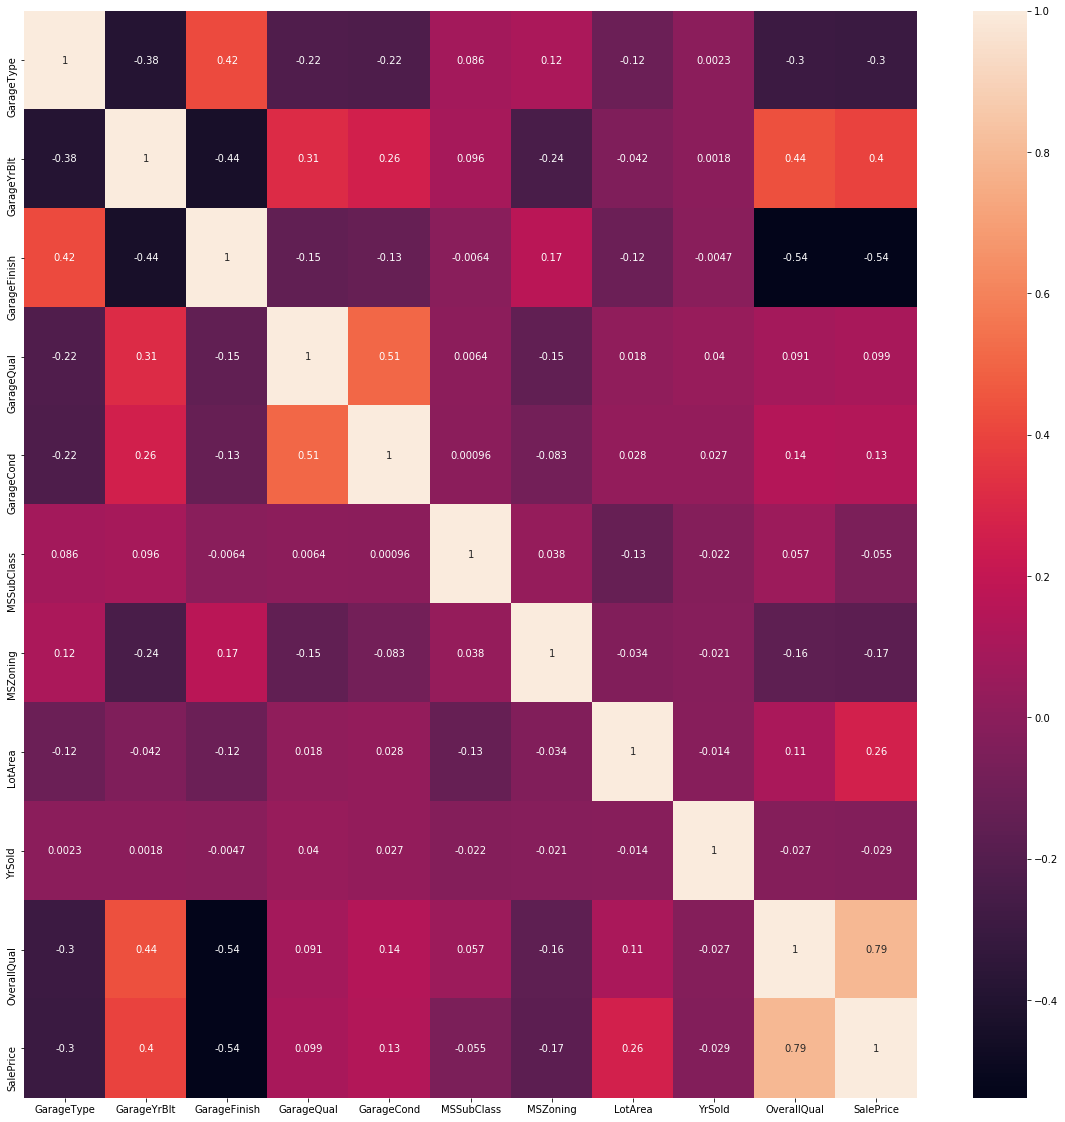

In [116]:
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(df_c.corr(),annot = True)